
Plot the decision surface of a decision tree on the iris dataset

Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

See :ref:`decision tree <tree>` for more information on the estimator.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.

This code was adapted from the example provided by scikit-learn, available at
http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#example-tree-plot-iris-py



<ipython-input-4-97c7fd353fb2>:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-4-97c7fd353fb2>:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-4-97c7fd353fb2>:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-4-97c7fd353fb2>:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-4-97c7fd353fb2>:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-i

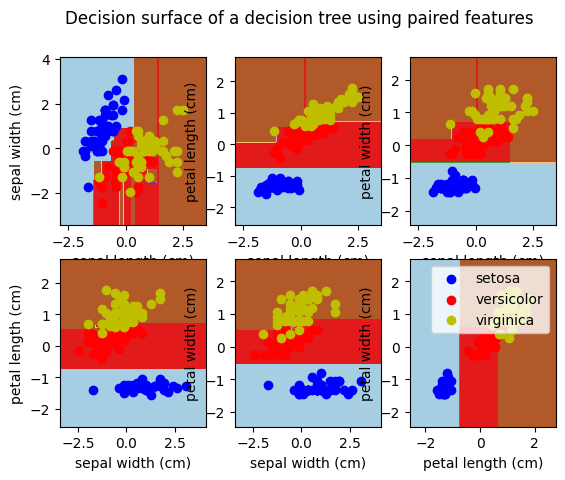

In [ ]:
# Part 1.1

"""
================================================================
Plot the decision surface of a decision tree on the iris dataset
================================================================

Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

See :ref:`decision tree <tree>` for more information on the estimator.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.

This code was adapted from the example provided by scikit-learn, available at
http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#example-tree-plot-iris-py
"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    # <array>.shape returns the dimensions of the array
    # arange (start,stop,step) creates a 1-D vector
    idx = np.arange(X.shape[0])  # returns an array from 0 to X.shape[0], or 150
    np.random.seed(13)  # Seed the randomization
    np.random.shuffle(idx)  # Shuffle in place based on the seeded randomization

    X = X[idx]   # re-sort X randomly based on IDX as indices
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)    # Take the mean over the first axis (long axis)
    std = X.std(axis=0)
    X = (X - mean) / std   # Normalize to a 'normal distribution'

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Meshgrid creates coordinate grid from vectors of coordinates
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    # Ravel creates a 1-D view of the vector
    # c_ concatenates 1D vectors into columns of a 2D array, basically
    #    making xx.ravel() column 0, yy.ravel() column 1
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [ ]:
# Part 1.2
'''
    TEMPLATE FOR MACHINE LEARNING HOMEWORK
    AUTHOR Eric Eaton, Chris Clingerman
'''

import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.metrics import accuracy_score



def evaluatePerformance():
    '''
    Evaluate the performance of decision trees,
    averaged over 1,000 trials of 10-fold cross validation

    Return:
      a matrix giving the performance that will contain the following entries:
      stats[0,0] = mean accuracy of decision tree
      stats[0,1] = std deviation of decision tree accuracy
      stats[1,0] = mean accuracy of decision stump
      stats[1,1] = std deviation of decision stump
      stats[2,0] = mean accuracy of 3-level decision tree
      stats[2,1] = std deviation of 3-level decision tree

    ** Note that your implementation must follow this API**
    '''

    # Load Data

    data_train = np.loadtxt('SPECTF.train', delimiter=',')
    data_test = np.loadtxt('SPECTF.test', delimiter=',')

    Xtrain = data_train[:, 1:]
    Xtest = data_test[:, 1:]

    ytrain = np.array([data_train[:, 0]]).T
    ytest = np.array([data_test[:, 0]]).T

    # train the decision tree
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(Xtrain,ytrain)

    # output predictions on the remaining data
    y_pred = clf.predict(Xtest)

    # compute the training accuracy of the model
    meanDecisionTreeAccuracy = accuracy_score(ytest, y_pred)


    # TODO: update these statistics based on the results of your experiment
    stddevDecisionTreeAccuracy = 0
    meanDecisionStumpAccuracy = 0
    stddevDecisionStumpAccuracy = 0
    meanDT3Accuracy = 0
    stddevDT3Accuracy = 0

    # make certain that the return value matches the API specification
    stats = np.zeros((3,2))
    stats[0,0] = meanDecisionTreeAccuracy
    stats[0,1] = stddevDecisionTreeAccuracy
    stats[1,0] = meanDecisionStumpAccuracy
    stats[1,1] = stddevDecisionStumpAccuracy
    stats[2,0] = meanDT3Accuracy
    stats[2,1] = stddevDT3Accuracy
    return stats



# Do not modify from HERE...
if __name__ == "__main__":

    stats = evaluatePerformance()
    print ("Decision Tree Accuracy = ", stats[0,0], " (", stats[0,1], ")")
    print ("Decision Stump Accuracy = ", stats[1,0], " (", stats[1,1], ")")
    print ("3-level Decision Tree = ", stats[2,0], " (", stats[2,1], ")")
# ...to HERE.

Decision Tree Accuracy =  0.6042780748663101  ( 0.0 )
Decision Stump Accuracy =  0.0  ( 0.0 )
3-level Decision Tree =  0.0  ( 0.0 )


In [ ]:
# Part 1.3

import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

def evaluatePerformance(num_trials=100, num_folds=10):
    # Initialize statistics
    accuracies = {'decision_tree': [], 'decision_stump': [], 'dt3': []}

    # Load and combine data
    data_train = np.loadtxt('SPECTF.train', delimiter=',')
    data_test = np.loadtxt('SPECTF.test', delimiter=',')
    data = np.vstack((data_train, data_test))  # Combining train and test data

    for trial in range(num_trials):
        np.random.shuffle(data)  # Shuffle data at the beginning of each trial

        kf = KFold(n_splits=num_folds)

        for fold, (train_index, test_index) in enumerate(kf.split(data)):
            # Splitting the dataset into training and testing
            train, test = data[train_index], data[test_index]
            Xtrain, ytrain = train[:, 1:], train[:, 0]
            Xtest, ytest = test[:, 1:], test[:, 0]

            # Train and evaluate Decision Tree
            clf = tree.DecisionTreeClassifier()
            clf.fit(Xtrain, ytrain)
            accuracy = accuracy_score(ytest, clf.predict(Xtest))
            accuracies['decision_tree'].append(accuracy)
            print(f"Trial {trial+1}, Fold {fold+1}, Decision Tree Accuracy: {accuracy}")

            # Train and evaluate Decision Stump
            stump = tree.DecisionTreeClassifier(max_depth=1)
            stump.fit(Xtrain, ytrain)
            stump_accuracy = accuracy_score(ytest, stump.predict(Xtest))
            accuracies['decision_stump'].append(stump_accuracy)
            print(f"Trial {trial+1}, Fold {fold+1}, Decision Stump Accuracy: {stump_accuracy}")

            # Train and evaluate 3-Level Decision Tree
            dt3 = tree.DecisionTreeClassifier(max_depth=3)
            dt3.fit(Xtrain, ytrain)
            dt3_accuracy = accuracy_score(ytest, dt3.predict(Xtest))
            accuracies['dt3'].append(dt3_accuracy)
            print(f"Trial {trial+1}, Fold {fold+1}, 3-Level Decision Tree Accuracy: {dt3_accuracy}")

    # Compute statistics
    stats = np.zeros((3,2))
    for i, key in enumerate(['decision_tree', 'decision_stump', 'dt3']):
        stats[i, 0] = np.mean(accuracies[key])
        stats[i, 1] = np.std(accuracies[key])

    return stats

if __name__ == "__main__":
    stats = evaluatePerformance()
    print("Final Decision Tree Accuracy = ", stats[0,0], " (", stats[0,1], ")")
    print("Final Decision Stump Accuracy = ", stats[1,0], " (", stats[1,1], ")")
    print("Final 3-level Decision Tree = ", stats[2,0], " (", stats[2,1], ")")


Trial 1, Fold 1, Decision Tree Accuracy: 0.6666666666666666
Trial 1, Fold 1, Decision Stump Accuracy: 0.8148148148148148
Trial 1, Fold 1, 3-Level Decision Tree Accuracy: 0.7037037037037037
Trial 1, Fold 2, Decision Tree Accuracy: 0.7777777777777778
Trial 1, Fold 2, Decision Stump Accuracy: 0.8148148148148148
Trial 1, Fold 2, 3-Level Decision Tree Accuracy: 0.7407407407407407
Trial 1, Fold 3, Decision Tree Accuracy: 0.4074074074074074
Trial 1, Fold 3, Decision Stump Accuracy: 0.7407407407407407
Trial 1, Fold 3, 3-Level Decision Tree Accuracy: 0.6666666666666666
Trial 1, Fold 4, Decision Tree Accuracy: 0.7037037037037037
Trial 1, Fold 4, Decision Stump Accuracy: 0.7407407407407407
Trial 1, Fold 4, 3-Level Decision Tree Accuracy: 0.7037037037037037
Trial 1, Fold 5, Decision Tree Accuracy: 0.8148148148148148
Trial 1, Fold 5, Decision Stump Accuracy: 0.8148148148148148
Trial 1, Fold 5, 3-Level Decision Tree Accuracy: 0.8148148148148148
Trial 1, Fold 6, Decision Tree Accuracy: 0.740740740740

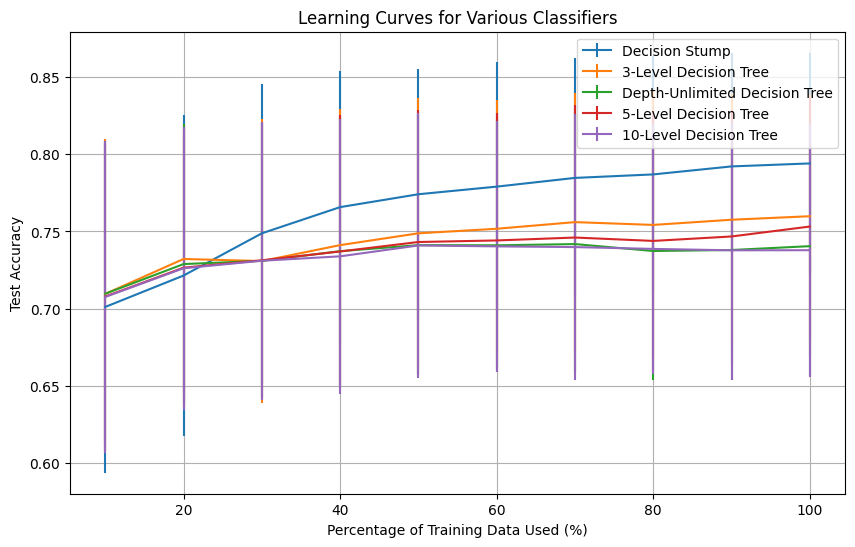

In [ ]:
# Part 1.4

import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

def evaluatePerformance(num_trials=100, num_folds=10):
    # Define classifiers to evaluate
    classifiers = {
        'Decision Stump': tree.DecisionTreeClassifier(max_depth=1),
        '3-Level Decision Tree': tree.DecisionTreeClassifier(max_depth=3),
        'Depth-Unlimited Decision Tree': tree.DecisionTreeClassifier(),
        '5-Level Decision Tree': tree.DecisionTreeClassifier(max_depth=5),
        '10-Level Decision Tree': tree.DecisionTreeClassifier(max_depth=10)
    }

    # Initialize data structures for learning curves
    learning_curves = {name: [] for name in classifiers}
    train_percentages = np.arange(0.1, 1.1, 0.1)  # 10%, 20%, ..., 100%

    # Load and combine data
    data_train = np.loadtxt('SPECTF.train', delimiter=',')
    data_test = np.loadtxt('SPECTF.test', delimiter=',')
    data = np.vstack((data_train, data_test))

    for trial in range(num_trials):
        np.random.shuffle(data)
        kf = KFold(n_splits=num_folds)

        for fold, (train_index, test_index) in enumerate(kf.split(data)):
            train, test = data[train_index], data[test_index]
            Xtest, ytest = test[:, 1:], test[:, 0]

            for train_percentage in train_percentages:
                size = int(train_percentage * len(train))
                Xtrain_subset, ytrain_subset = train[:size, 1:], train[:size, 0]

                for name, clf in classifiers.items():
                    clf.fit(Xtrain_subset, ytrain_subset)
                    accuracy = accuracy_score(ytest, clf.predict(Xtest))
                    learning_curves[name].append((train_percentage, accuracy))

    # Compute mean and standard deviation for learning curves
    mean_std_curves = {name: {'mean': [], 'std': []} for name in classifiers}
    for name in classifiers:
        for percentage in train_percentages:
            accuracies = [acc for percent, acc in learning_curves[name] if percent == percentage]
            mean_std_curves[name]['mean'].append(np.mean(accuracies))
            mean_std_curves[name]['std'].append(np.std(accuracies))

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    for name in classifiers:
        means = mean_std_curves[name]['mean']
        stds = mean_std_curves[name]['std']
        plt.errorbar(train_percentages * 100, means, yerr=stds, label=name)

    plt.title("Learning Curves for Various Classifiers")
    plt.xlabel("Percentage of Training Data Used (%)")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

    return mean_std_curves

if __name__ == "__main__":
    mean_std_curves = evaluatePerformance()
